# Test Bench
Test Bench is a class that was created in order to get easily access to the quality of each model on multiple datasets.
By choosing a prediction model type, multiple instances are created- each one of them is trained and tested on different data set.

## Choosing a test to perform
There is the possibility of running multiple tests at the same time. In the configuration below, eight tests will be performed; three for Container CPU/Memory and two for Node Memory.

In [1]:
test_to_perform = (
    # Container CPU
    {"metric": "container_cpu", "app": "kube-rbac-proxy", "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
    {"metric": "container_cpu", "app": "dns",             "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
    {"metric": "container_cpu", "app": "collector",       "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
    # Container Memory
    {"metric": "container_mem", "app": "nmstate-handler", "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
    {"metric": "container_mem", "app": "coredns",         "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
    {"metric": "container_mem", "app": "keepalived",      "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
    # Node Memory
    {"metric": "node_mem",      "app": "moc/smaug",       "prediction length": 16, "sub sample rate": 30, "data length limit": 30},
    {"metric": "node_mem",      "app": "emea/balrog",     "prediction length": 16, "sub sample rate": 30, "data length limit": 30}
)

## Parameters:
1. metric: Metric name (container_cpu / container_mem / node_mem)
2. app: Name of the app we want to predict
3. prediction length: Number of samples we want to predict in the future
4. sub sample rate: How many minutes per one sample (default is one sample per one minute)
5. data length limit: Throw out time series that are shorten than that
In the example above, prediction length will be one sample per half an hour, time series shorter than 30 samples (or 15 hours) long won't be count and 16 samples (or 8 hours) will be predicted into the future.

In [2]:
import numpy as np
import src.framework__test_bench as bench

In [3]:
class DumbPredictor:
    def __init__(self, length_of_shortest_time_series, metric, app):
        print("Constructor called.")
        self.print_once = True

    def learn_from_data_set(self, training_data_set):
        print("Training started.")
        print("What does a dataframe to learn on look like?")
        display(training_data_set[0])
        print("Training ending.")

    def predict(self, ts_as_df_start, how_much_to_predict):
        if self.print_once:
            self.print_once = False
            print("What does a dataframe to predict look like?")
            display(ts_as_df_start)
        ts_as_np = ts_as_df_start["sample"].to_numpy()
        res = np.resize(ts_as_np, how_much_to_predict)
        # these checks will also be done by the testbench
        assert isinstance(res, np.ndarray)
        assert len(res) == how_much_to_predict
        assert res.shape == (how_much_to_predict,)
        assert res.dtype == np.float64
        return res

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='container_cpu', app='kube-rbac-proxy'.
[TEST BENCH] Fetching data for metric='container_cpu', app='kube-rbac-proxy'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 30 minutes.
[TEST BENCH] Throwing out data that is less than 15.0 hours long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train/test data is 2111
[TEST BENCH] Making an instance of the class we want to test
Constructor called.
[TEST BENCH] Starting training loop
Training started.
What does a dataframe to learn on look like?


,sample,time
0,-0.736449,2022-05-17 03:30:00
1,-0.501867,2022-05-17 04:00:00
2,-0.604155,2022-05-17 04:30:00
3,-0.685547,2022-05-17 05:00:00
4,-0.693364,2022-05-17 05:30:00
5,-0.733132,2022-05-17 06:00:00
6,-0.613928,2022-05-17 06:30:00
7,-0.513776,2022-05-17 07:00:00
8,-0.594165,2022-05-17 07:30:00
9,-0.521768,2022-05-17 08:00:00


Training ending.
[TEST BENCH] Training took 0.012989997863769531 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.736449,2022-05-17 03:30:00
1,-0.501867,2022-05-17 04:00:00
2,-0.604155,2022-05-17 04:30:00
3,-0.685547,2022-05-17 05:00:00
4,-0.693364,2022-05-17 05:30:00
5,-0.733132,2022-05-17 06:00:00
6,-0.613928,2022-05-17 06:30:00
7,-0.513776,2022-05-17 07:00:00
8,-0.594165,2022-05-17 07:30:00
9,-0.521768,2022-05-17 08:00:00


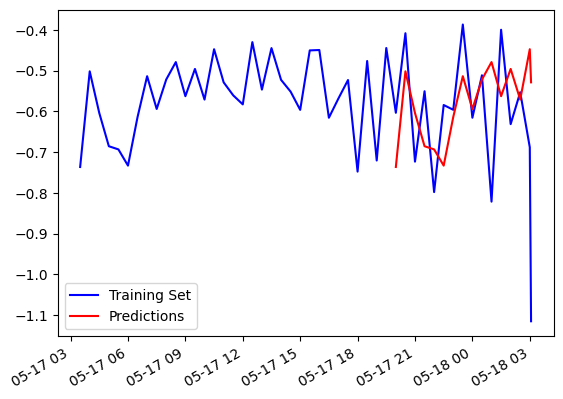

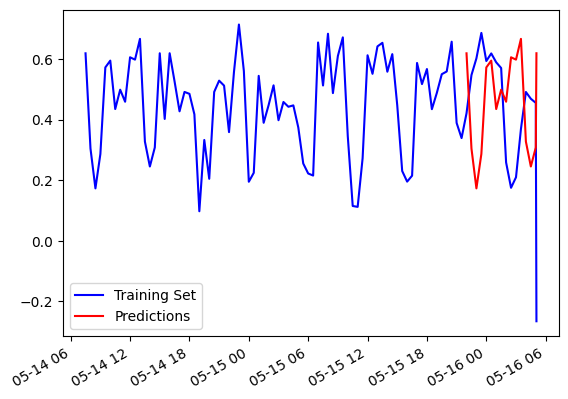

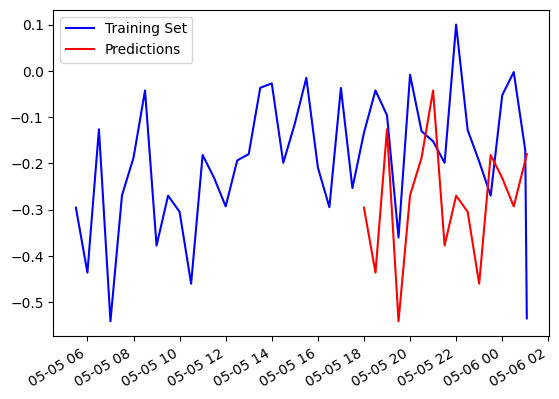

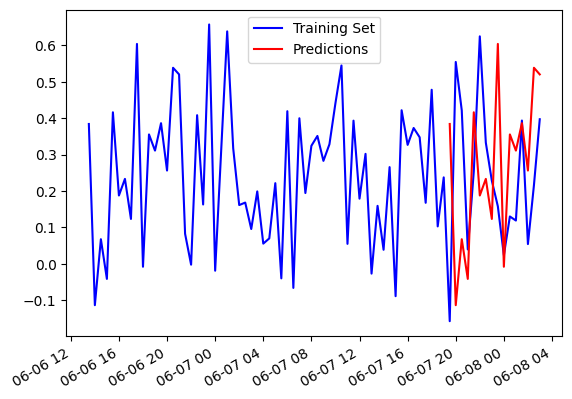

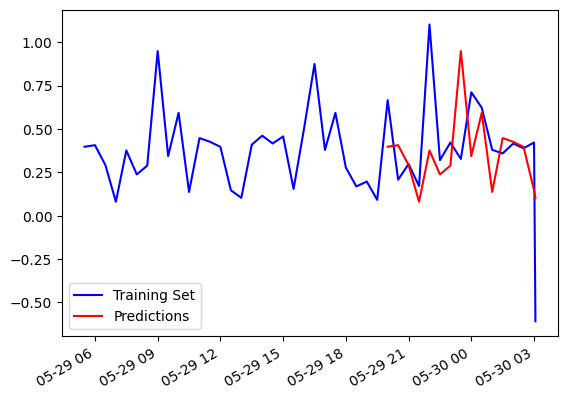

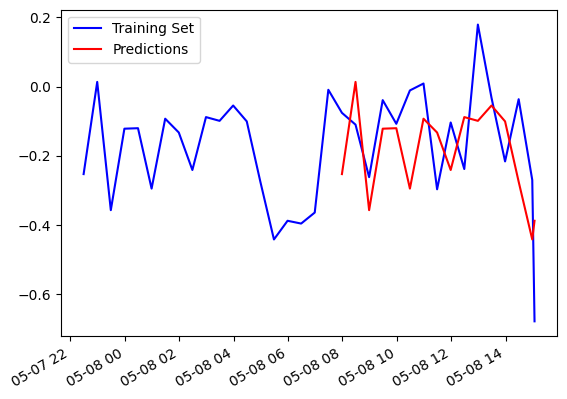

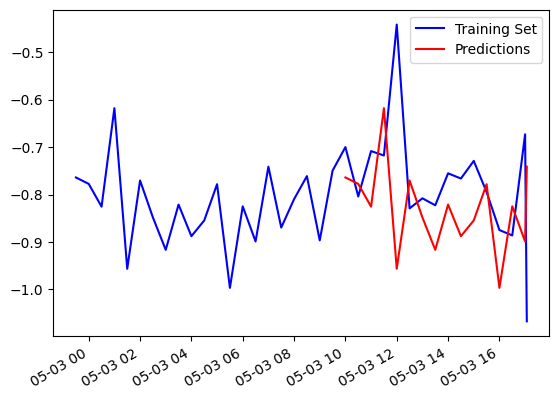

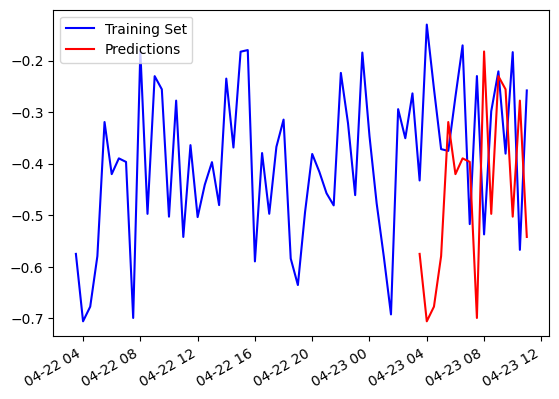

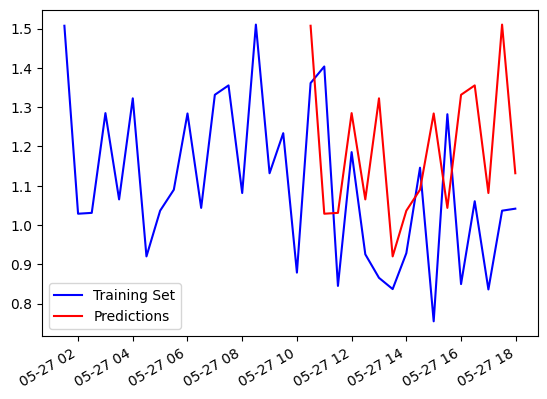

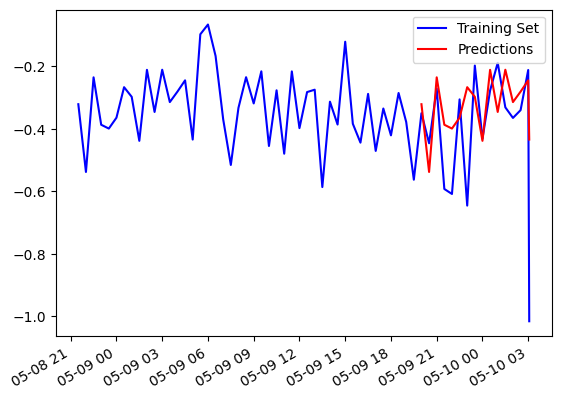

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='kube-rbac-proxy':
[TEST BENCH] Training time in seconds is             0.012989997863769531
[TEST BENCH] Average mse over the test set is        0.13267374929871895
[TEST BENCH] Average precision over the test set is  0.4712713519440197
[TEST BENCH] Average recall over the test set is     0.5011605532211879
[TEST BENCH] Average F1 over the test set is         0.47905479640270543
[TEST BENCH] Average MASE over the test set is       1.3747733577347254
[TEST BENCH] Average MAPE over the test set is       1.298577065450201
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='kube-rbac-proxy'
[TEST BENCH] testing metric='container_cpu', app='dns'.
[TEST BENCH] Fetching data for metric='container_cpu', app='dns'.
[TEST BENCH] Subsampling data fr

,sample,time
0,-0.291163,2022-05-16 13:30:00
1,-0.514092,2022-05-16 14:00:00
2,-0.628313,2022-05-16 14:30:00
3,-0.506071,2022-05-16 15:00:00
4,-0.342291,2022-05-16 15:30:00
...,...,...
56,-0.013904,2022-05-17 17:30:00
57,-0.373054,2022-05-17 18:00:00
58,-0.094420,2022-05-17 18:30:00
59,-0.383968,2022-05-17 19:00:00


Training ending.
[TEST BENCH] Training took 0.005202293395996094 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.291163,2022-05-16 13:30:00
1,-0.514092,2022-05-16 14:00:00
2,-0.628313,2022-05-16 14:30:00
3,-0.506071,2022-05-16 15:00:00
4,-0.342291,2022-05-16 15:30:00
...,...,...
56,-0.013904,2022-05-17 17:30:00
57,-0.373054,2022-05-17 18:00:00
58,-0.094420,2022-05-17 18:30:00
59,-0.383968,2022-05-17 19:00:00


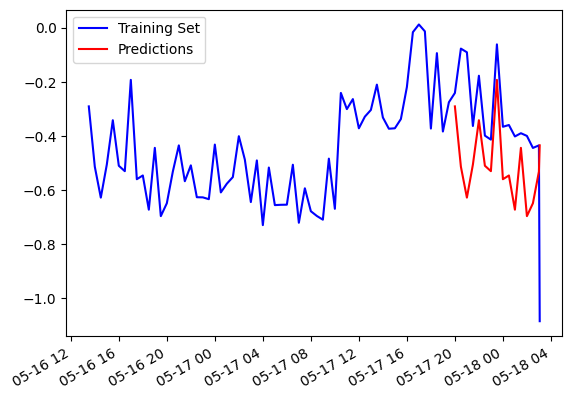

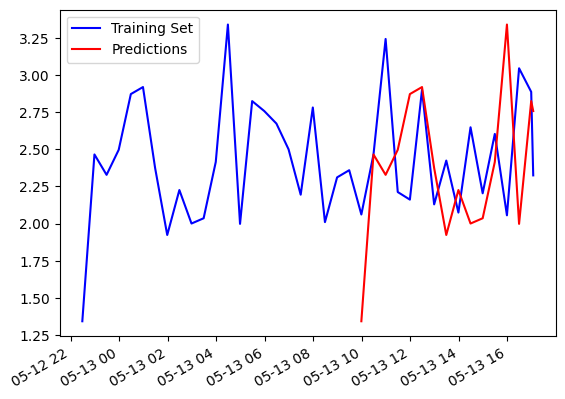

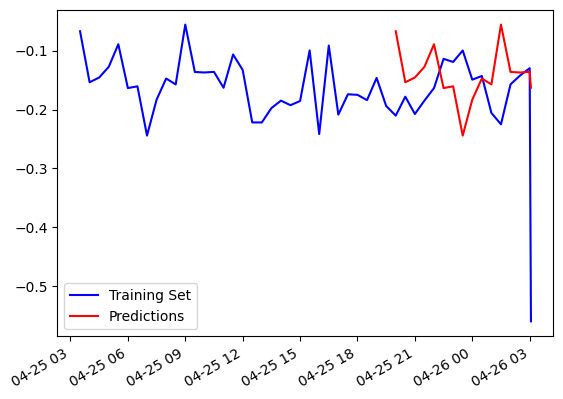

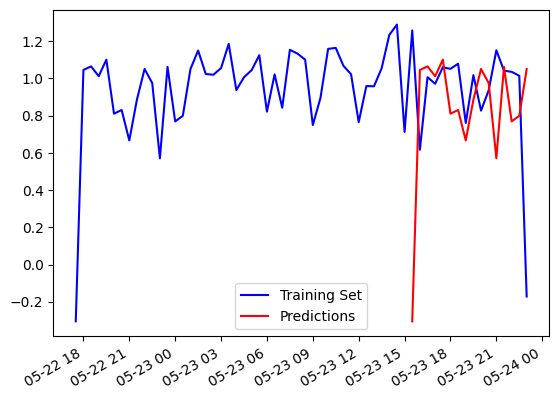

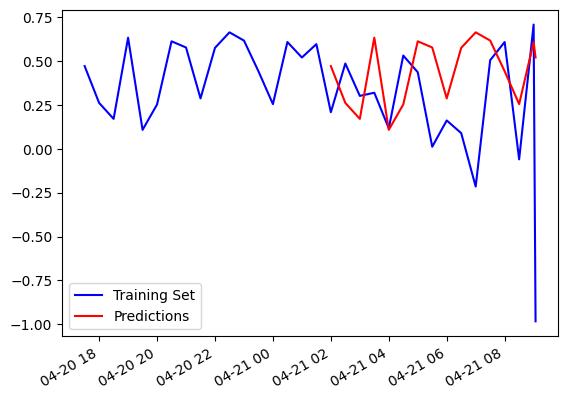

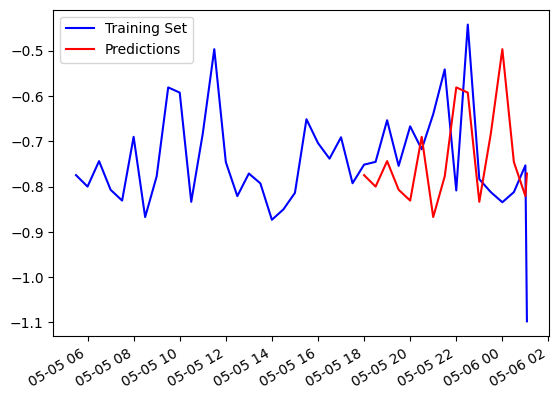

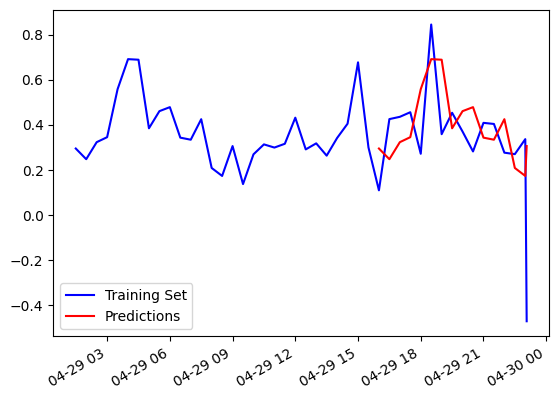

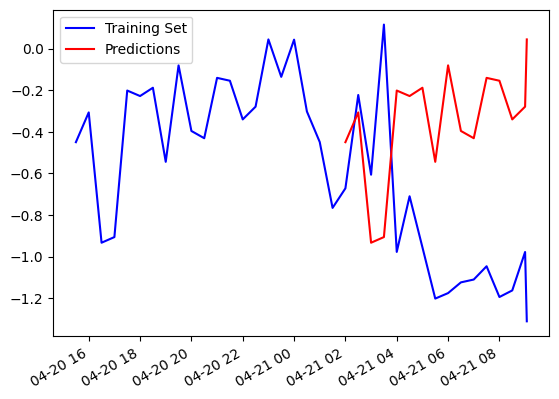

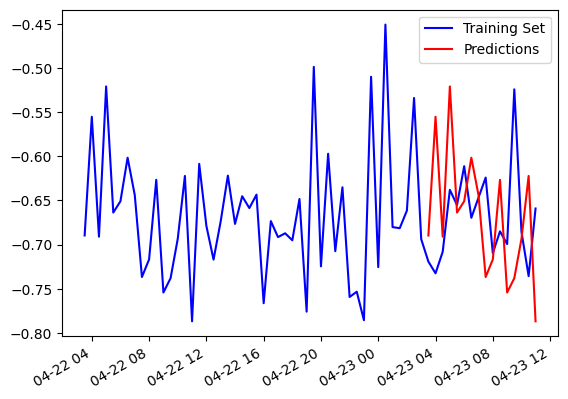

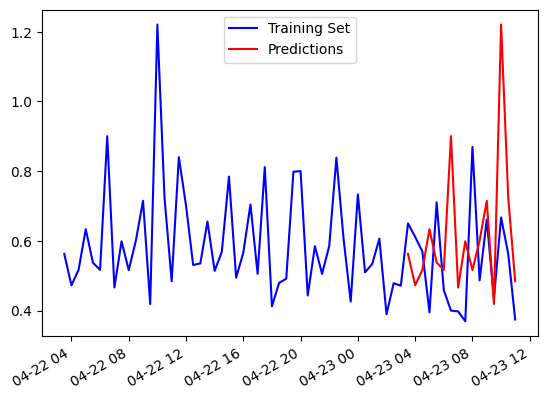

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='dns':
[TEST BENCH] Training time in seconds is             0.005202293395996094
[TEST BENCH] Average mse over the test set is        0.18139837806980164
[TEST BENCH] Average precision over the test set is  0.4737150801757543
[TEST BENCH] Average recall over the test set is     0.5047957099080695
[TEST BENCH] Average F1 over the test set is         0.4823664358353189
[TEST BENCH] Average MASE over the test set is       1.3962925252716514
[TEST BENCH] Average MAPE over the test set is       2.0375585790695583
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='dns'
[TEST BENCH] testing metric='container_cpu', app='collector'.
[TEST BENCH] Fetching data for metric='container_cpu', app='collector'.
[TEST BENCH] Subsampling data from 1 sample 

,sample,time
0,-0.697971,2022-05-23 03:30:00
1,-0.690378,2022-05-23 04:00:00
2,-0.686876,2022-05-23 04:30:00
3,-0.694830,2022-05-23 05:00:00
4,-0.708118,2022-05-23 05:30:00
5,-0.700985,2022-05-23 06:00:00
6,-0.706604,2022-05-23 06:30:00
7,-0.707704,2022-05-23 07:00:00
8,-0.716949,2022-05-23 07:30:00
9,-0.723925,2022-05-23 08:00:00


Training ending.
[TEST BENCH] Training took 0.005504608154296875 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.697971,2022-05-23 03:30:00
1,-0.690378,2022-05-23 04:00:00
2,-0.686876,2022-05-23 04:30:00
3,-0.694830,2022-05-23 05:00:00
4,-0.708118,2022-05-23 05:30:00
5,-0.700985,2022-05-23 06:00:00
6,-0.706604,2022-05-23 06:30:00
7,-0.707704,2022-05-23 07:00:00
8,-0.716949,2022-05-23 07:30:00
9,-0.723925,2022-05-23 08:00:00


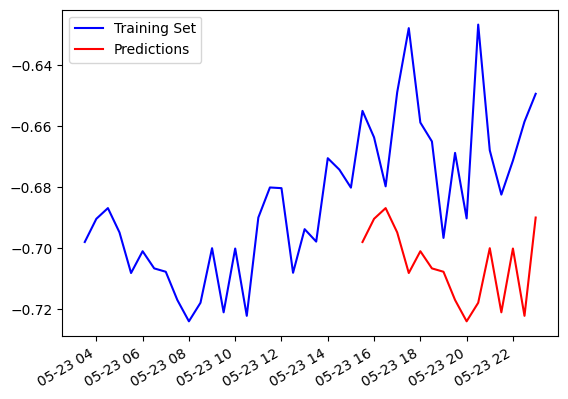

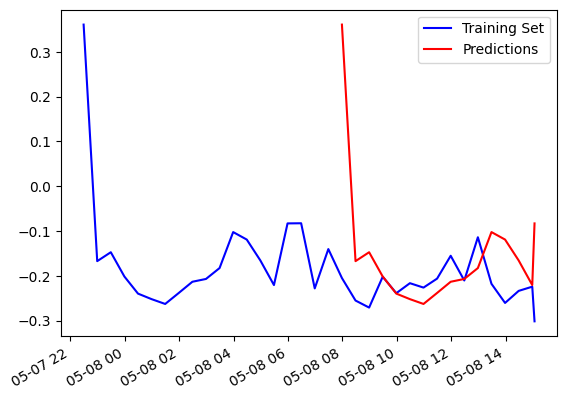

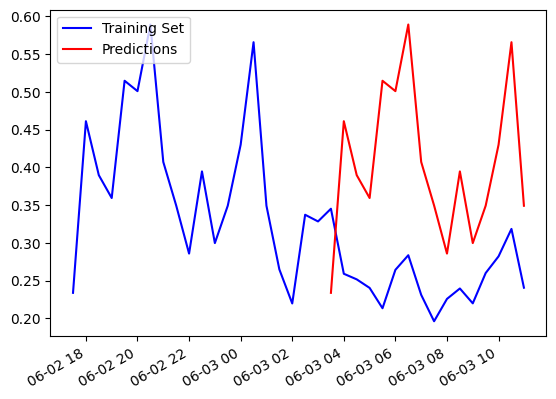

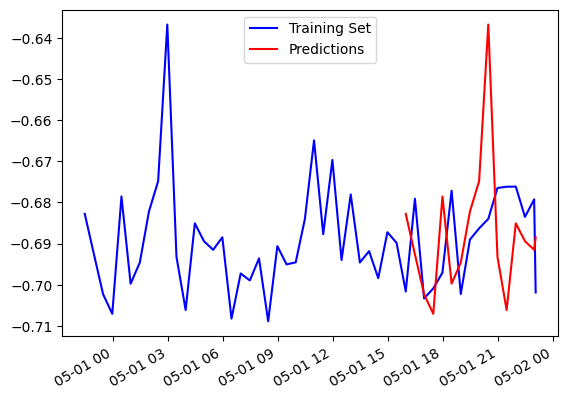

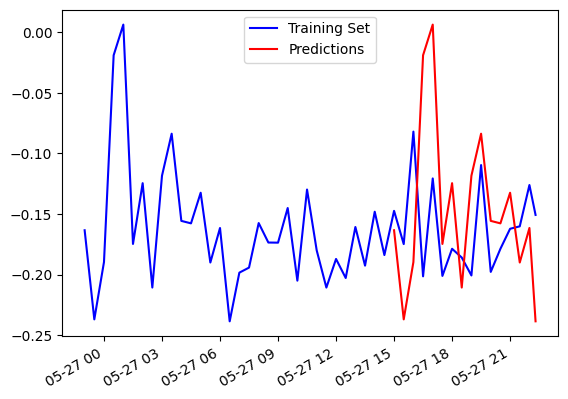

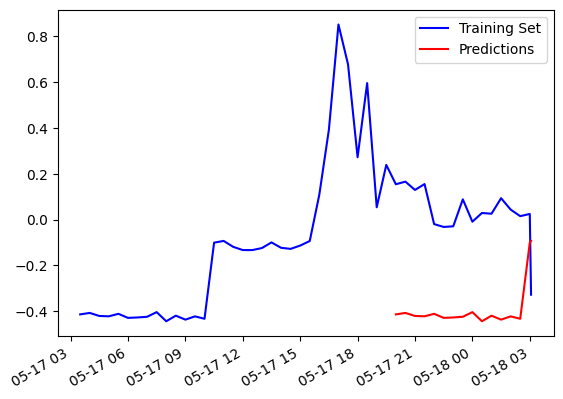

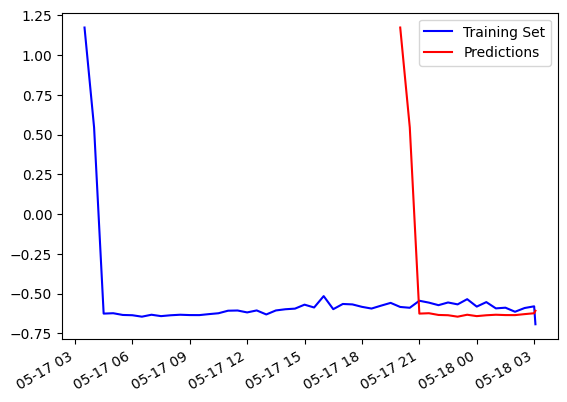

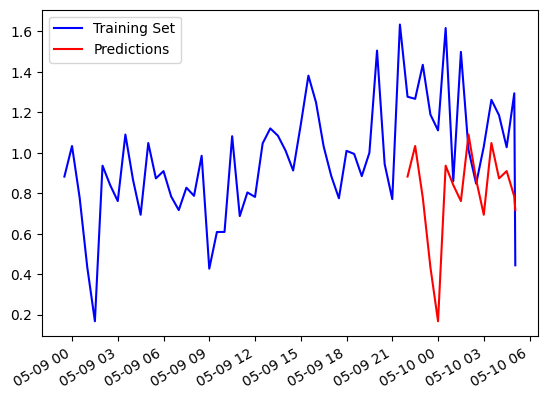

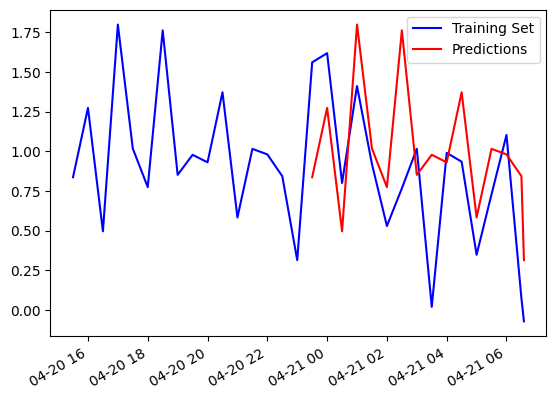

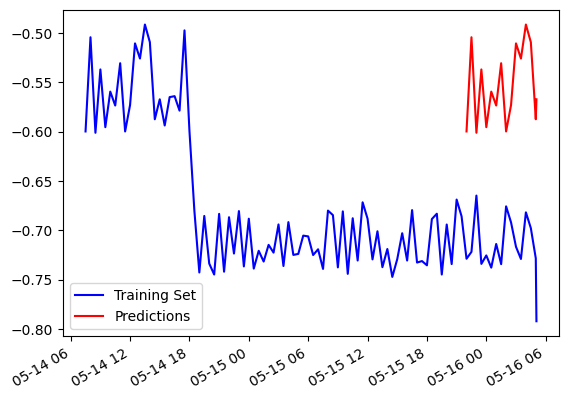

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_cpu', app='collector':
[TEST BENCH] Training time in seconds is             0.005504608154296875
[TEST BENCH] Average mse over the test set is        0.5384308604060659
[TEST BENCH] Average precision over the test set is  0.48233603314248474
[TEST BENCH] Average recall over the test set is     0.5159301208264336
[TEST BENCH] Average F1 over the test set is         0.4921368886123635
[TEST BENCH] Average MASE over the test set is       2.106313185642837
[TEST BENCH] Average MAPE over the test set is       1.895432717416712
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_cpu', app='collector'
[TEST BENCH] testing metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Fetching data for metric='container_mem', app='nmstate-handler'.
[TEST BENCH] Subsampli

,sample,time
0,-0.823736,2022-04-20 17:30:00
1,-0.831732,2022-04-20 18:00:00
2,0.044034,2022-04-20 18:30:00
3,-0.824431,2022-04-20 19:00:00
4,-0.841814,2022-04-20 19:30:00
5,1.451727,2022-04-20 20:00:00
6,1.439559,2022-04-20 20:30:00
7,0.448716,2022-04-20 21:00:00
8,-0.816087,2022-04-20 21:30:00
9,1.383237,2022-04-20 22:00:00


Training ending.
[TEST BENCH] Training took 0.004443645477294922 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.823736,2022-04-20 17:30:00
1,-0.831732,2022-04-20 18:00:00
2,0.044034,2022-04-20 18:30:00
3,-0.824431,2022-04-20 19:00:00
4,-0.841814,2022-04-20 19:30:00
5,1.451727,2022-04-20 20:00:00
6,1.439559,2022-04-20 20:30:00
7,0.448716,2022-04-20 21:00:00
8,-0.816087,2022-04-20 21:30:00
9,1.383237,2022-04-20 22:00:00


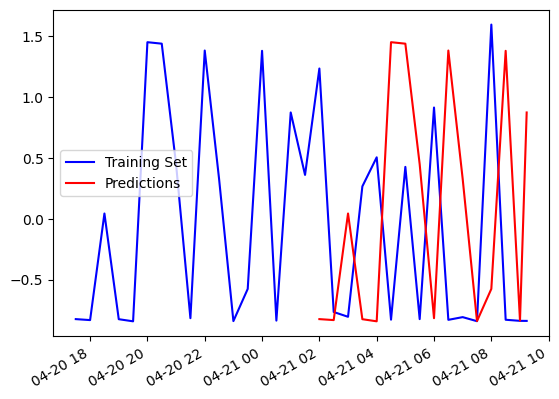

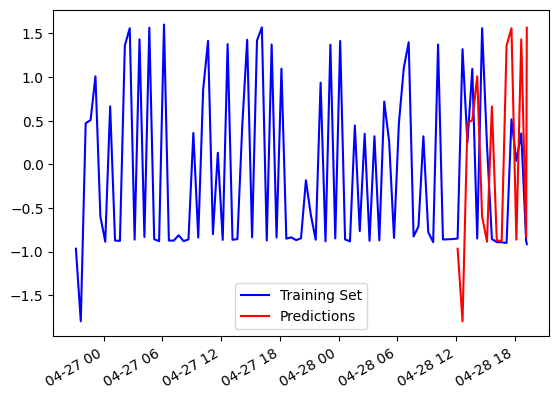

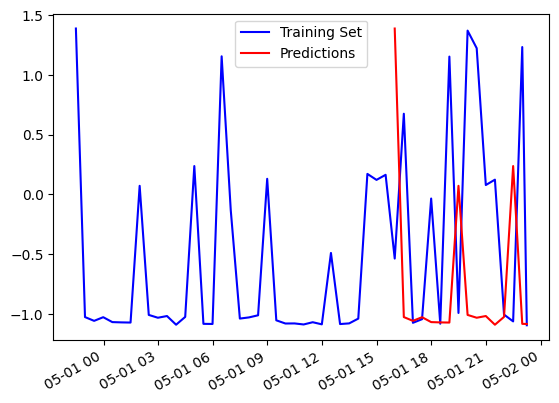

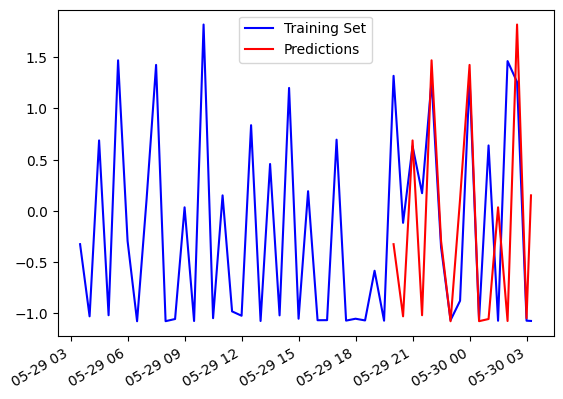

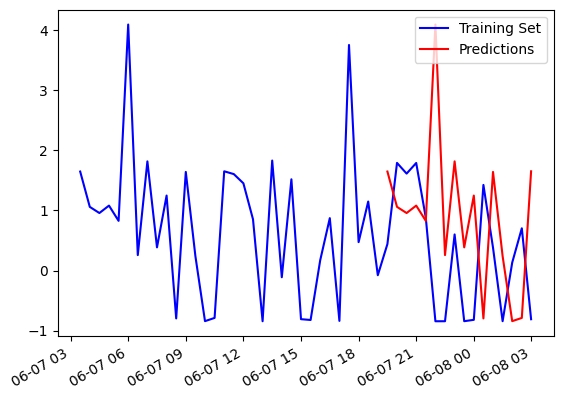

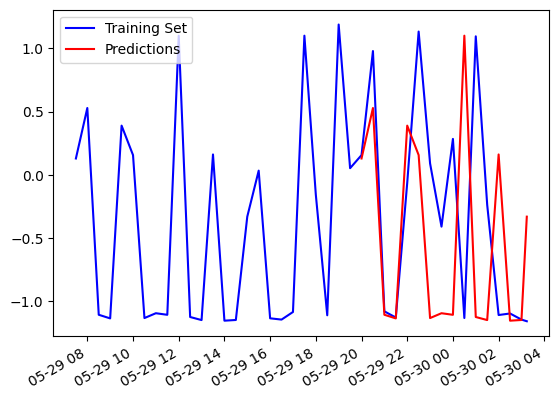

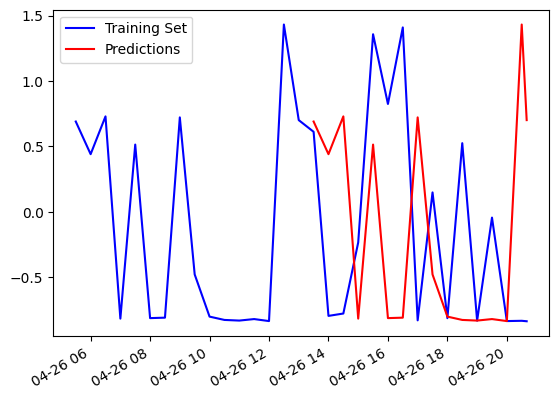

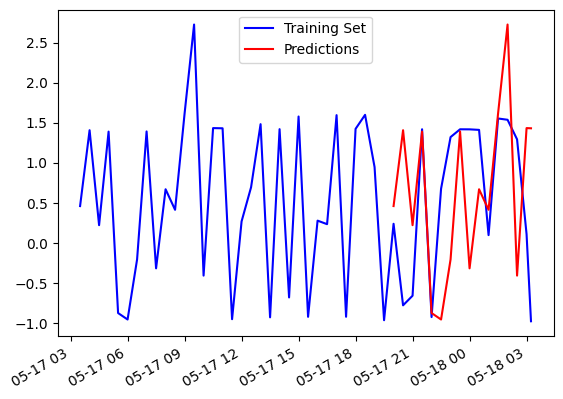

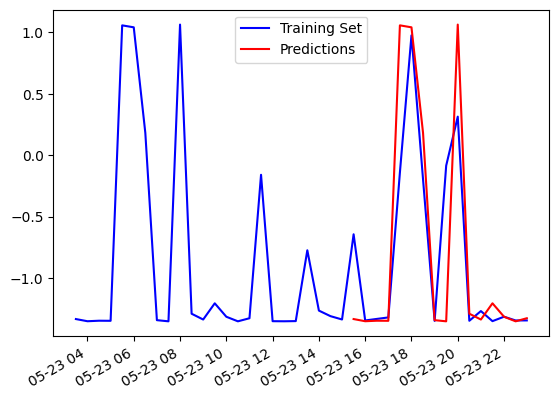

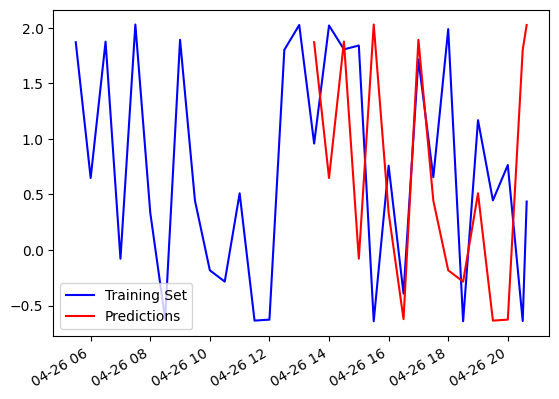

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='nmstate-handler':
[TEST BENCH] Training time in seconds is             0.004443645477294922
[TEST BENCH] Average mse over the test set is        1.7227890365921374
[TEST BENCH] Average precision over the test set is  0.4769557460201324
[TEST BENCH] Average recall over the test set is     0.498383809349604
[TEST BENCH] Average F1 over the test set is         0.4809217763179934
[TEST BENCH] Average MASE over the test set is       1.0411722375560972
[TEST BENCH] Average MAPE over the test set is       6.4299626244952455
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='nmstate-handler'
[TEST BENCH] testing metric='container_mem', app='coredns'.
[TEST BENCH] Fetching data for metric='container_mem', app='coredns'.
[TEST BENCH] Subsampling d

,sample,time
0,0.930557,2022-05-17 05:30:00
1,0.807263,2022-05-17 06:00:00
2,0.819873,2022-05-17 06:30:00
3,0.934760,2022-05-17 07:00:00
4,1.000610,2022-05-17 07:30:00
5,0.842290,2022-05-17 08:00:00
6,1.010418,2022-05-17 08:30:00
7,0.891327,2022-05-17 09:00:00
8,0.919348,2022-05-17 09:30:00
9,0.793253,2022-05-17 10:00:00


Training ending.
[TEST BENCH] Training took 0.005155801773071289 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,0.930557,2022-05-17 05:30:00
1,0.807263,2022-05-17 06:00:00
2,0.819873,2022-05-17 06:30:00
3,0.934760,2022-05-17 07:00:00
4,1.000610,2022-05-17 07:30:00
5,0.842290,2022-05-17 08:00:00
6,1.010418,2022-05-17 08:30:00
7,0.891327,2022-05-17 09:00:00
8,0.919348,2022-05-17 09:30:00
9,0.793253,2022-05-17 10:00:00


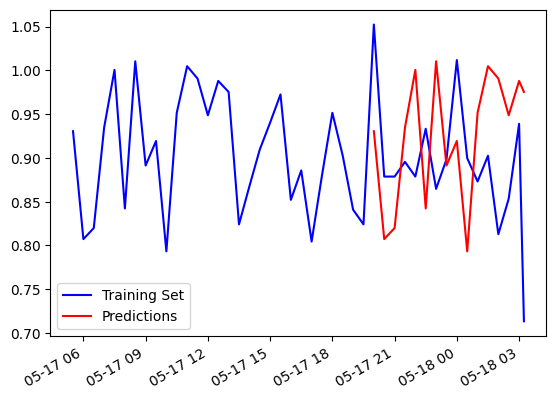

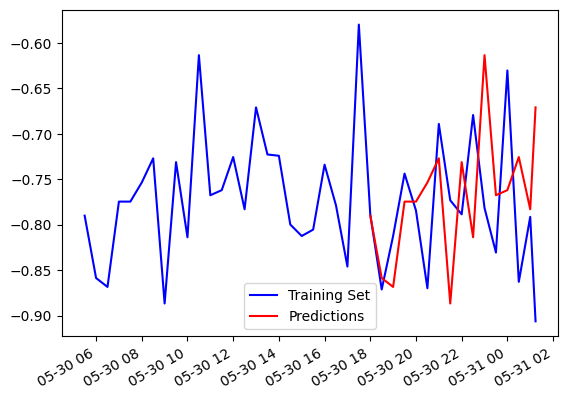

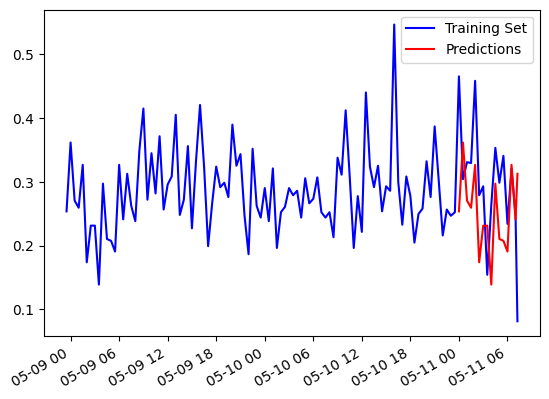

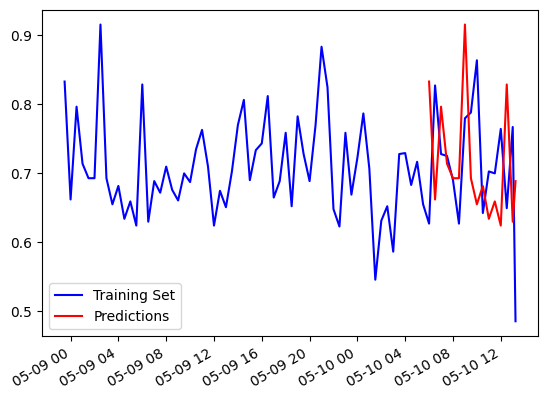

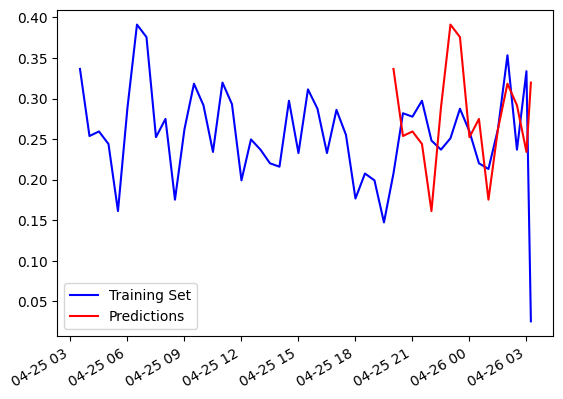

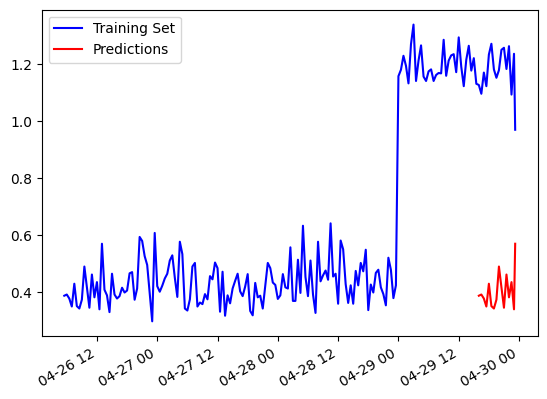

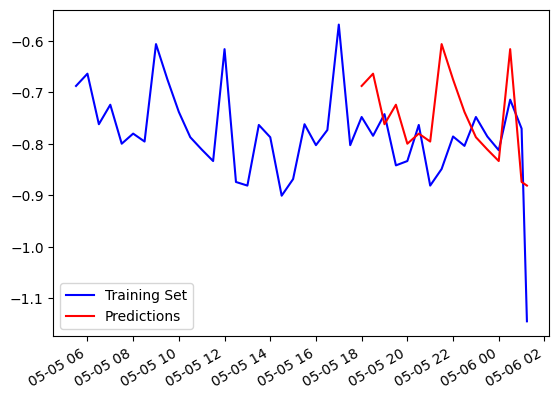

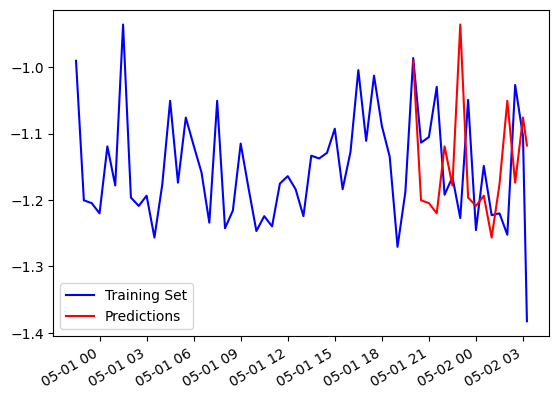

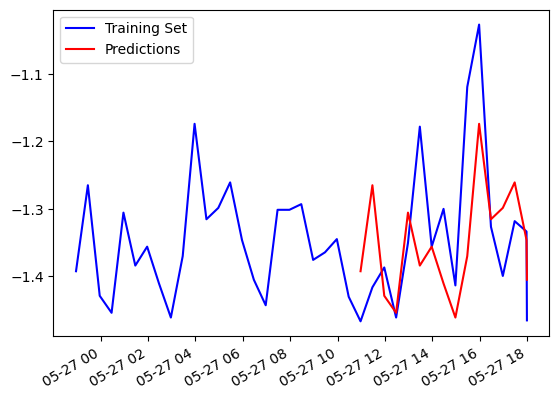

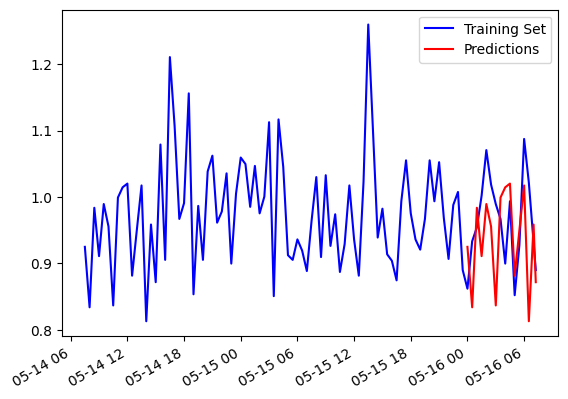

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='coredns':
[TEST BENCH] Training time in seconds is             0.005155801773071289
[TEST BENCH] Average mse over the test set is        0.04026297067547729
[TEST BENCH] Average precision over the test set is  0.4725728435231678
[TEST BENCH] Average recall over the test set is     0.49789362305561025
[TEST BENCH] Average F1 over the test set is         0.47834907393346443
[TEST BENCH] Average MASE over the test set is       1.5502001281678661
[TEST BENCH] Average MAPE over the test set is       0.9640466755447589
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='coredns'
[TEST BENCH] testing metric='container_mem', app='keepalived'.
[TEST BENCH] Fetching data for metric='container_mem', app='keepalived'.
[TEST BENCH] Subsampling data fr

,sample,time
0,-1.113343,2022-04-22 03:30:00
1,-1.187165,2022-04-22 04:00:00
2,-1.159083,2022-04-22 04:30:00
3,-1.039351,2022-04-22 05:00:00
4,-1.192175,2022-04-22 05:30:00
...,...,...
84,-1.035238,2022-04-23 21:30:00
85,-0.949416,2022-04-23 22:00:00
86,-0.876198,2022-04-23 22:30:00
87,-0.931525,2022-04-23 23:00:00


Training ending.
[TEST BENCH] Training took 0.0054264068603515625 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-1.113343,2022-04-22 03:30:00
1,-1.187165,2022-04-22 04:00:00
2,-1.159083,2022-04-22 04:30:00
3,-1.039351,2022-04-22 05:00:00
4,-1.192175,2022-04-22 05:30:00
...,...,...
84,-1.035238,2022-04-23 21:30:00
85,-0.949416,2022-04-23 22:00:00
86,-0.876198,2022-04-23 22:30:00
87,-0.931525,2022-04-23 23:00:00


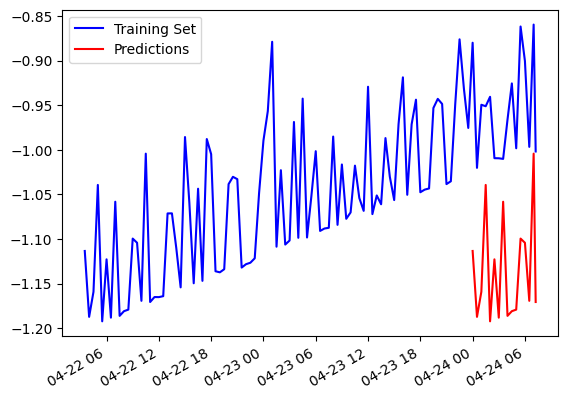

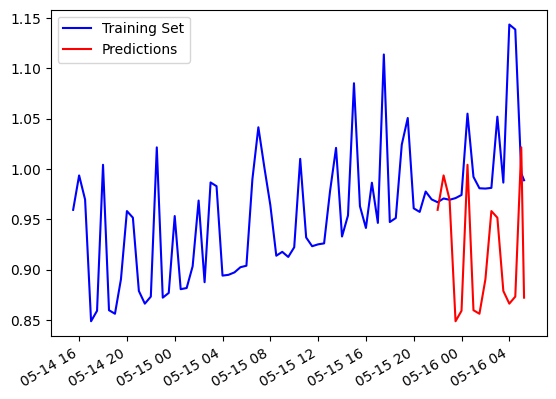

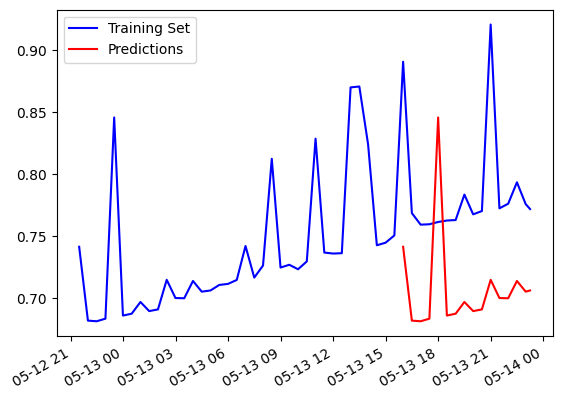

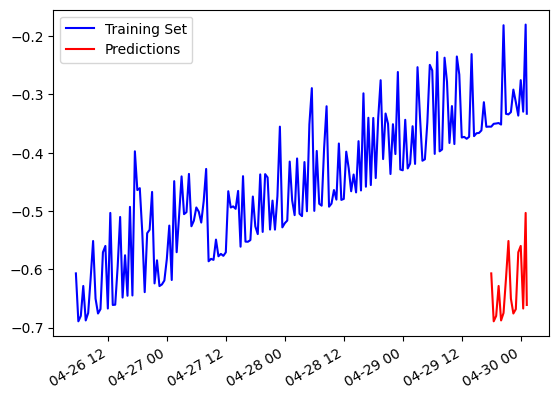

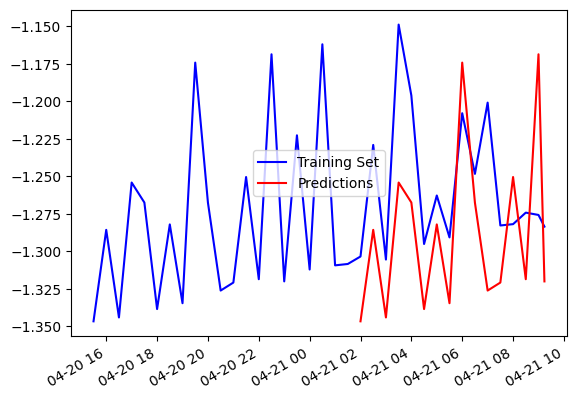

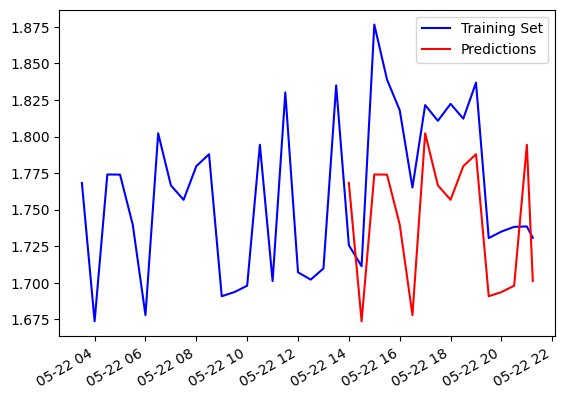

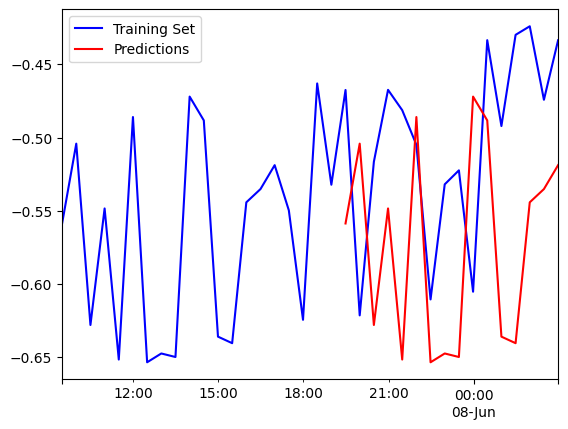

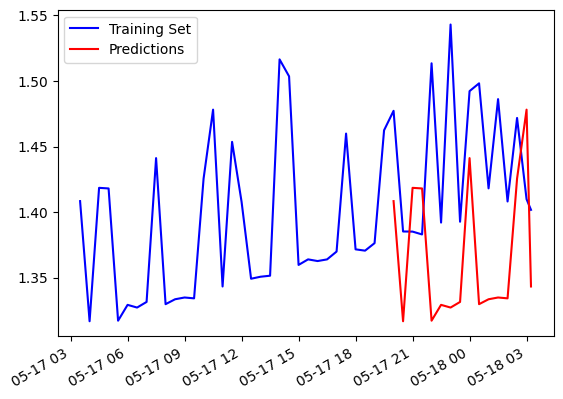

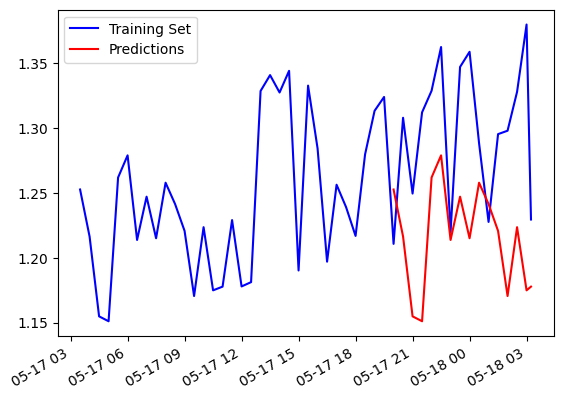

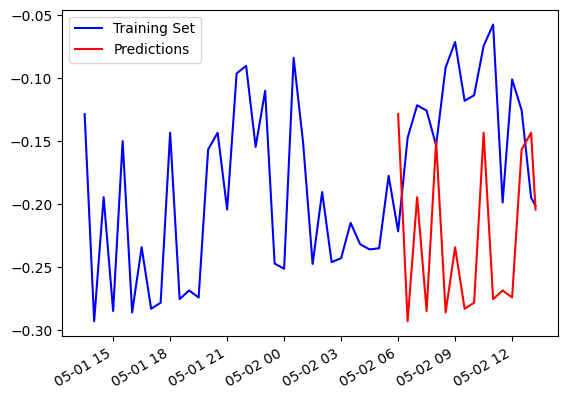

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='container_mem', app='keepalived':
[TEST BENCH] Training time in seconds is             0.0054264068603515625
[TEST BENCH] Average mse over the test set is        0.017643249268959105
[TEST BENCH] Average precision over the test set is  0.5266960242822312
[TEST BENCH] Average recall over the test set is     0.5536393491565903
[TEST BENCH] Average F1 over the test set is         0.5336569911471158
[TEST BENCH] Average MASE over the test set is       1.7762359628096556
[TEST BENCH] Average MAPE over the test set is       0.4392158158965687
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='container_mem', app='keepalived'
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 s

,sample,time
0,-0.741555,2022-05-28 10:29:00
1,-0.744372,2022-05-28 10:59:00
2,-0.744329,2022-05-28 11:29:00
3,-0.744325,2022-05-28 11:59:00
4,-0.744326,2022-05-28 12:29:00
...,...,...
62,-0.752532,2022-05-29 17:29:00
63,-0.752531,2022-05-29 17:59:00
64,-0.752529,2022-05-29 18:29:00
65,-0.752530,2022-05-29 18:59:00


Training ending.
[TEST BENCH] Training took 0.005319356918334961 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.741555,2022-05-28 10:29:00
1,-0.744372,2022-05-28 10:59:00
2,-0.744329,2022-05-28 11:29:00
3,-0.744325,2022-05-28 11:59:00
4,-0.744326,2022-05-28 12:29:00
...,...,...
62,-0.752532,2022-05-29 17:29:00
63,-0.752531,2022-05-29 17:59:00
64,-0.752529,2022-05-29 18:29:00
65,-0.752530,2022-05-29 18:59:00


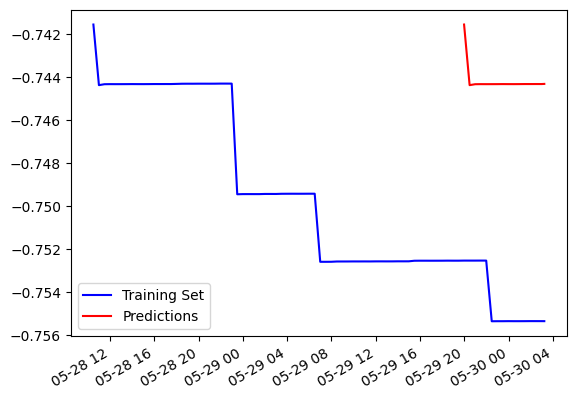

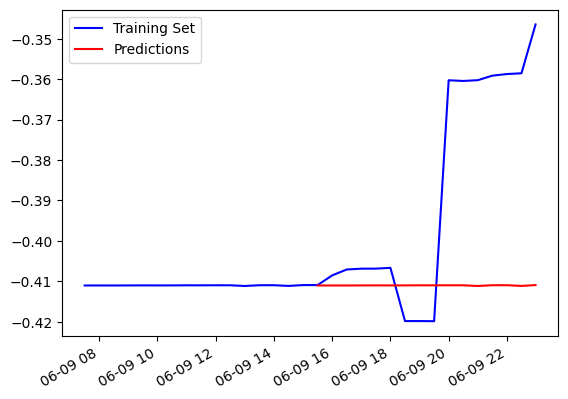

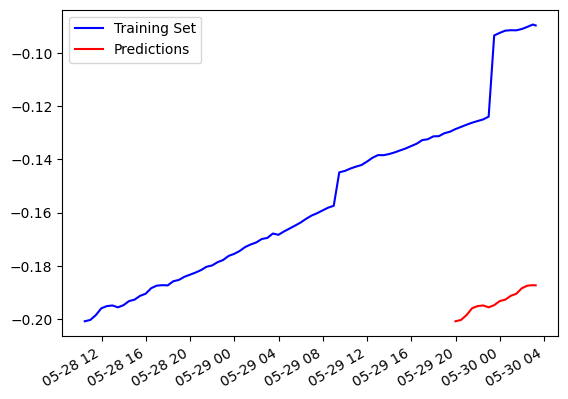

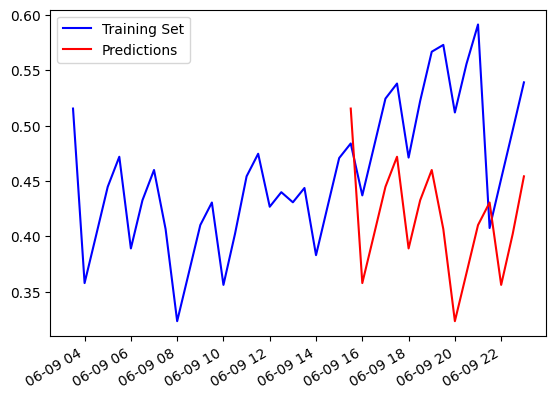

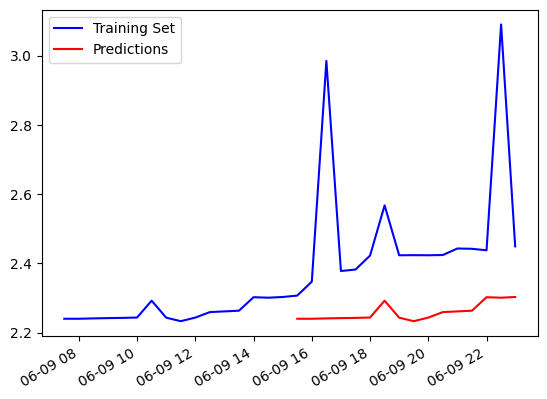

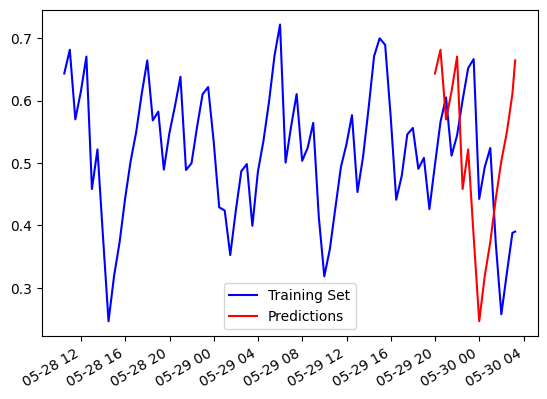

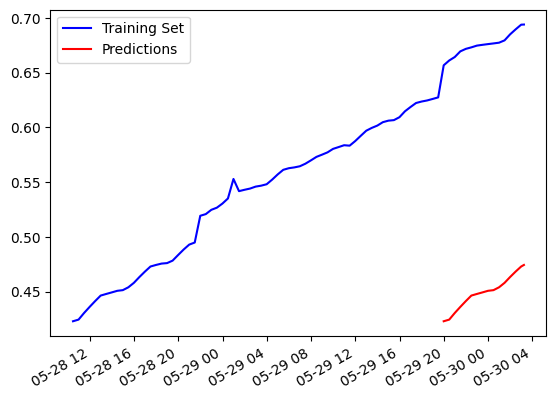

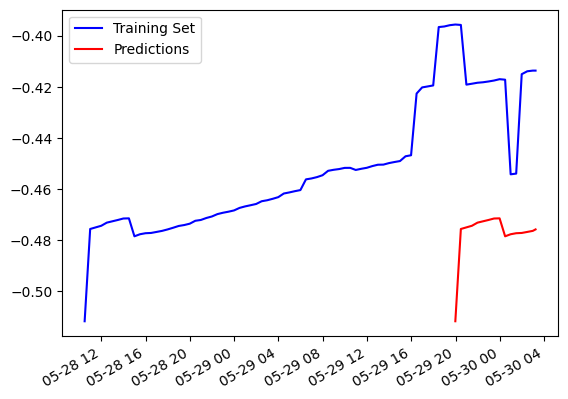

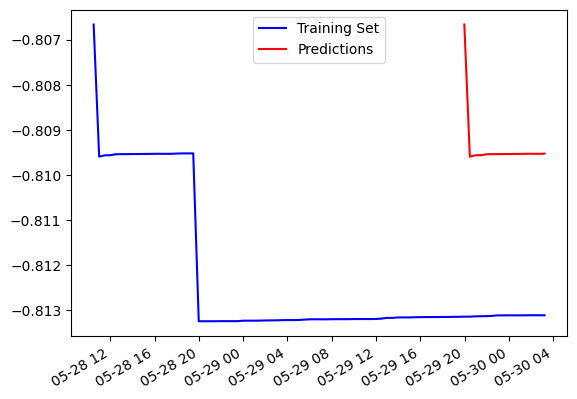

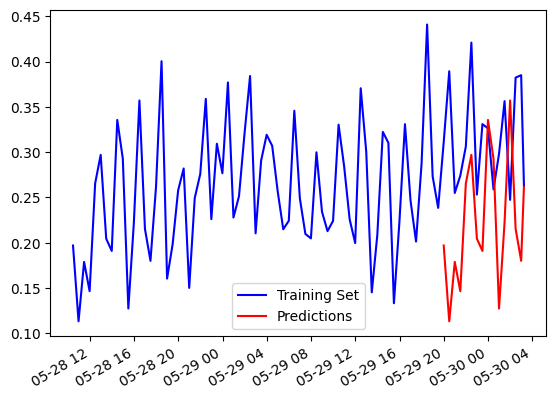

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Training time in seconds is             0.005319356918334961
[TEST BENCH] Average mse over the test set is        0.011412570506251456
[TEST BENCH] Average precision over the test set is  0.7044309970539478
[TEST BENCH] Average recall over the test set is     0.741808919677772
[TEST BENCH] Average F1 over the test set is         0.7182935874481711
[TEST BENCH] Average MASE over the test set is       51.23733651126518
[TEST BENCH] Average MAPE over the test set is       0.22012937072063543
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node_mem', app='emea/balrog'.
[TEST BENCH] Subsampling data from 1 sample per 

,sample,time
0,-0.219079,2022-06-09 07:30:00
1,-0.219044,2022-06-09 08:00:00
2,-0.219044,2022-06-09 08:30:00
3,-0.219044,2022-06-09 09:00:00
4,-0.219044,2022-06-09 09:30:00
5,-0.219011,2022-06-09 10:00:00
6,-0.219010,2022-06-09 10:30:00
7,-0.219008,2022-06-09 11:00:00
8,-0.219010,2022-06-09 11:30:00
9,-0.218974,2022-06-09 12:00:00


Training ending.
[TEST BENCH] Training took 0.005166053771972656 seconds.
[TEST BENCH] Starting testing loop
What does a dataframe to predict look like?


,sample,time
0,-0.219079,2022-06-09 07:30:00
1,-0.219044,2022-06-09 08:00:00
2,-0.219044,2022-06-09 08:30:00
3,-0.219044,2022-06-09 09:00:00
4,-0.219044,2022-06-09 09:30:00
5,-0.219011,2022-06-09 10:00:00
6,-0.219010,2022-06-09 10:30:00
7,-0.219008,2022-06-09 11:00:00
8,-0.219010,2022-06-09 11:30:00
9,-0.218974,2022-06-09 12:00:00


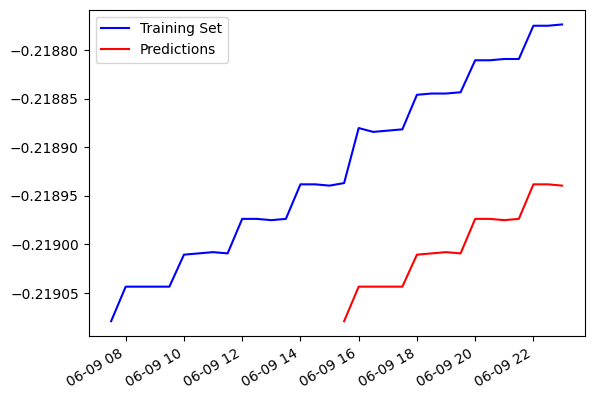

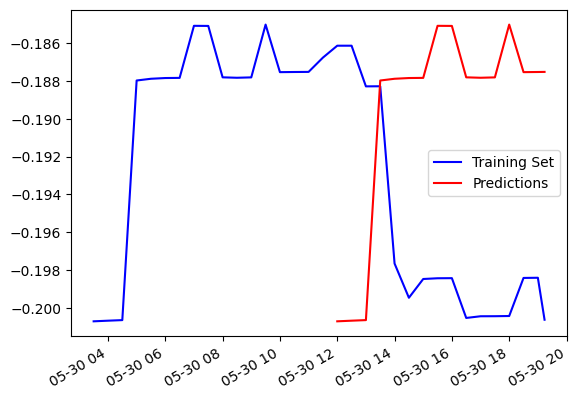

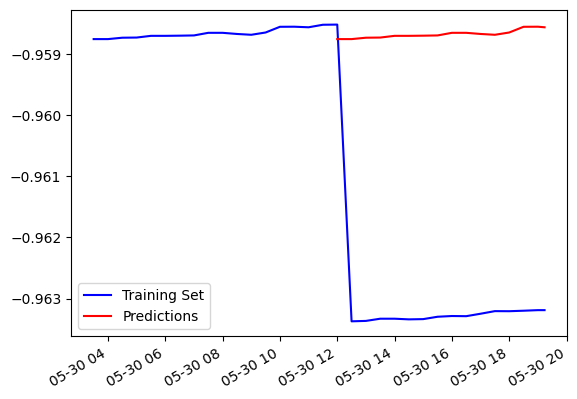

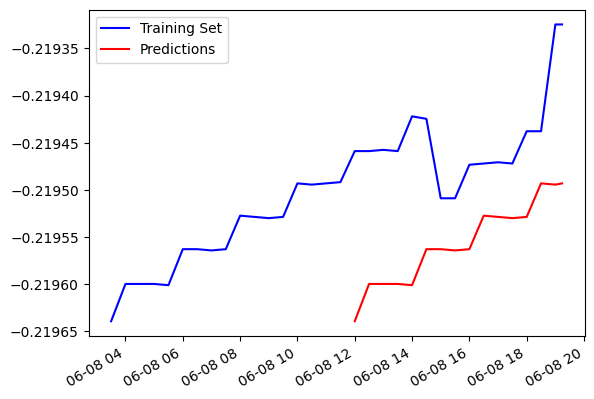

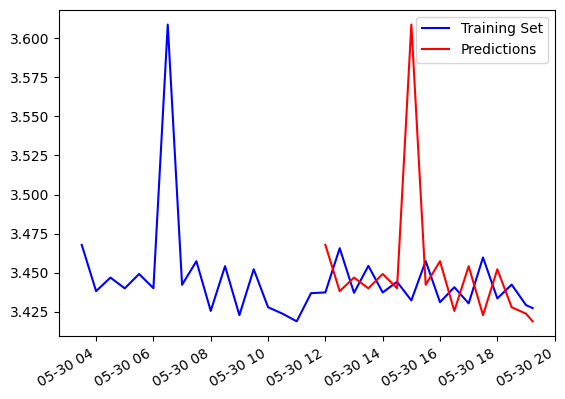

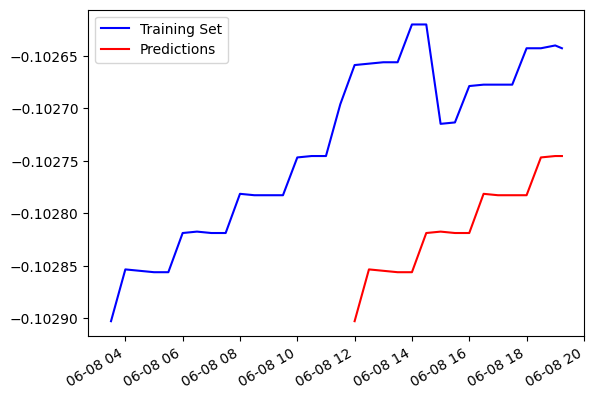

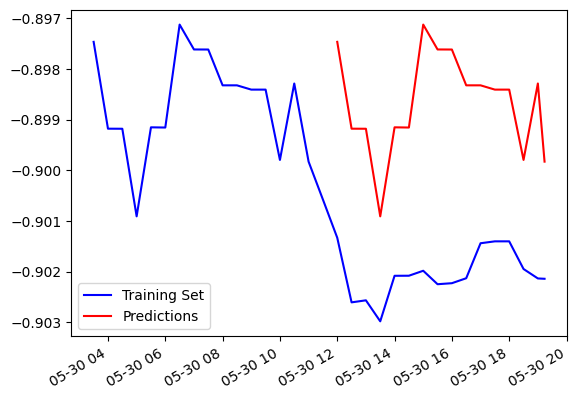

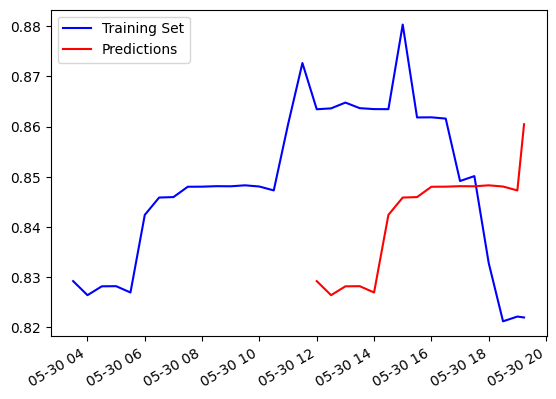

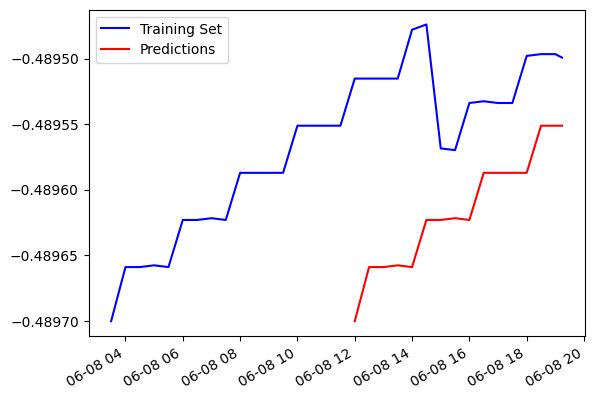

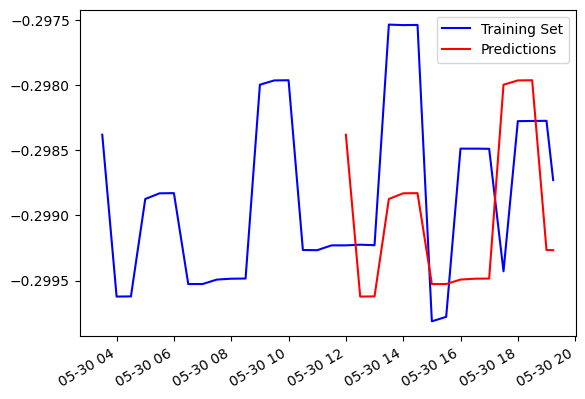

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='emea/balrog':
[TEST BENCH] Training time in seconds is             0.005166053771972656
[TEST BENCH] Average mse over the test set is        0.002923149763070874
[TEST BENCH] Average precision over the test set is  0.6710168997668997
[TEST BENCH] Average recall over the test set is     0.6812275224775225
[TEST BENCH] Average F1 over the test set is         0.6682876854902027
[TEST BENCH] Average MASE over the test set is       21.737775156061467
[TEST BENCH] Average MAPE over the test set is       0.04961831206706902
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='emea/balrog'
[TEST BENCH] | metric | app | training time | mse | precision | recall | F1 | MASE | MAPE |
[TEST BENCH] | container_cpu | kube-rbac-proxy | 0 seconds   | 0.13267 | 0.471

In [4]:
tb = bench.TestBench(
    class_to_test=DumbPredictor,
    path_to_data="../data/",
    tests_to_perform = test_to_perform
)
tb.run_training_and_tests()